In [ ]:
!pip install tensorflow_hub

In [ ]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/email.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.shape

(5573, 2)

In [ ]:
df["Category"].value_counts()

ham               4825
spam               747
{"mode":"full"       1
Name: Category, dtype: int64

In [ ]:
df.groupby("Category").describe()

Message         \
                 count unique   
Category                        
ham               4825   4516   
spam               747    641   
{"mode":"full"       1      1   

                                                                        
                                                              top freq  
Category                                                                
ham                                        Sorry, I'll call later   30  
spam            Please call our customer service representativ...    4  
{"mode":"full"                                    isActive:false}    1

In [ ]:
df_spam=df[df["Category"]=="spam"]
df_spam

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
df_ham=df[df["Category"]=="ham"]
df_ham

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df_ham.shape

(4825, 2)

In [ ]:
df_spam.shape

(747, 2)

In [ ]:
df_ham=df_ham.sample(df_spam.shape[0])
df_ham

,Category,Message
545,ham,This girl does not stay in bed. This girl does...
3703,ham,Hey loverboy! I love you !! I had to tell ... ...
2953,ham,Tell me whos this pls:-)
1498,ham,I'm putting it on now. It should be ready for ...
2327,ham,The Xmas story is peace.. The Xmas msg is love...
...,...,...
4350,ham,Ü bot notes oredi... Cos i juz rem i got...
5367,ham,Just trying to figure out when I'm suppose to ...
4110,ham,I want to lick your pussy now...
1341,ham,Might ax well im there.


In [ ]:
df_bal=pd.concat([df_spam,df_ham])
df_bal.shape

(1494, 2)

In [ ]:
df_bal["Category"].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [ ]:
df_bal["spam"]=df_bal["Category"].apply(lambda x:1 if x=="spam" else 0)
df_bal

,Category,Message,spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
4350,ham,Ü bot notes oredi... Cos i juz rem i got...,0
5367,ham,Just trying to figure out when I'm suppose to ...,0
4110,ham,I want to lick your pussy now...,0
1341,ham,Might ax well im there.,0


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df_bal["Message"],df_bal["spam"],stratify=df_bal["spam"])


In [ ]:
xtrain.head(10)

1688    Free Top ringtone -sub to weekly ringtone-get ...
3898                 No. Thank you. You've been wonderful
2897    pdate_Now - Double mins and 1000 txts on Orang...
1887    Dear 0776xxxxxxx U've been invited to XCHAT. T...
5214    Natalja (25/F) is inviting you to be her frien...
3897    tells u 2 call 09066358152 to claim £5000 priz...
4798    Santa calling! Would your little ones like a c...
1821    I'll probably be by tomorrow (or even later to...
3820    sorry brah, just finished the last of my exams...
1874    You have WON a guaranteed £1000 cash or a £200...
Name: Message, dtype: object

In [ ]:
preprocessor = hub.KerasLayer(
    "https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")

encoder = hub.KerasLayer(
    "https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4")

In [ ]:
def get_embedding(sentences):
  pre_text=preprocessor(sentences)
  return encoder(pre_text)["pooled_output"]
get_embedding(["i have a good dog","why are yous os late?"])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.85222226, -0.34614292, -0.32255614, ..., -0.07847673,
        -0.64383966,  0.9216547 ],
       [-0.9060574 , -0.39384782, -0.9474154 , ..., -0.8670752 ,
        -0.71034676,  0.9494272 ]], dtype=float32)>

In [ ]:
#bert layers
input=tf.keras.layers.Input(shape=(),dtype=tf.string,name="input")
text=preprocessor(inputs)
output=encoder(text)

#nn layers
l=tf.keras.layers.Dropout(0.1,name="dropout")(output["pooled_output"])
l=tf.keras.layers.Dense(1,activation="sigmoid",name="output")(l)


model=tf.keras.Model(inputs=[inputs],outputs=[l])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['input[0][0]']               
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                              

In [ ]:
M=[
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall")
]

model.compile(
    optimizer="adam",
    loss="binary_crossentropy"
    ,metrics=M
)

In [ ]:
model.fit(xtrain,ytrain,epochs=1)

35/35 [==============================] - 521s 15s/step - loss: 0.6237 - accuracy: 0.6804 - precision: 0.6884 - recall: 0.6589


In [ ]:
model.evaluate(xtest,ytest)

12/12 [==============================] - 177s 15s/step - loss: 0.5626 - accuracy: 0.8289 - precision: 0.8436 - recall: 0.8075


[0.5626096129417419,
 0.8288770318031311,
 0.8435754179954529,
 0.8074866533279419]

In [ ]:
ypred=model.predict(xtest)
ypred=ypred.flatten()

12/12 [==============================] - 225s 19s/step


In [ ]:
import numpy as np

ypred=np.where(ypred>0.5,1,0)
ypred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[159,  28],
       [ 36, 151]])

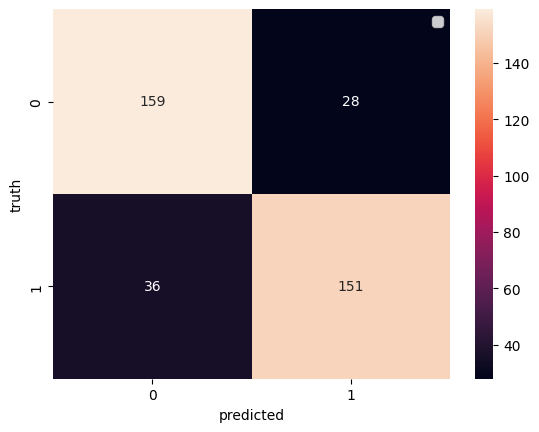

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")
plt.legend()
plt.show()

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       187
           1       0.84      0.81      0.83       187

    accuracy                           0.83       374
   macro avg       0.83      0.83      0.83       374
weighted avg       0.83      0.83      0.83       374



In [ ]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 6s 6s/step


array([[0.6165189 ],
       [0.58912176],
       [0.62457067],
       [0.42661142],
       [0.3403623 ]], dtype=float32)

In [ ]:
model.save("spamcheckingmodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
os.listdir('.')


['.config', 'spamcheckingmodel.h5', 'drive', 'sample_data']

In [ ]:
import os

# Check if the model file exists in the current directory
model_filename = 'spamcheckingmodel.h5'
if os.path.exists(model_filename):
    print(f"The model file '{model_filename}' exists in the current directory.")
else:
    print(f"The model file '{model_filename}' does not exist in the current directory.")


The model file 'spamcheckingmodel.h5' exists in the current directory.


In [ ]:
from google.colab import files
files.download('spamcheckingmodel.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.0


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
y
Y

  Successfully uninstalled tensorflow-2.15.0
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 

In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np

# Load your TensorFlow model
model = tf.keras.utils.custom_object_scope('spamcheckingmodel.h5')

# Define a function to make predictions with your model
def predict(text):
    prediction = model.predict([text])  # Assuming your model accepts text input
    # Post-process the output (if necessary)
    spam_probability = prediction[0][0]
    if spam_probability > 0.5:
        return "Spam", spam_probability
    else:
        return "Not Spam", spam_probability

input_text = gr.inputs.Textbox(lines=10, label="Enter email text")
output_label = gr.outputs.Label(label="Prediction")
output_confidence = gr.outputs.Label(label="Confidence")

# Create Gradio interface
gr.Interface(fn=predict, inputs=input_text, outputs=[output_label, output_confidence],
             title='Spam Email Detector', description='Enter the text of an email to determine if it\'s spam.').launch()



AttributeError: module 'gradio' has no attribute 'inputs'

In [ ]:
import gradio as gr

# Define Gradio interface
input_text = gr.Interface(
    lambda text: text,  # Just echoing back the input text for demonstration
    inputs=gr.inputs.Textbox(lines=10, label="Enter your text here"),
    outputs="text"
)

# Launch Gradio interface
input_text.launch()


AttributeError: module 'gradio' has no attribute 'inputs'

In [ ]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="textbox", outputs="textbox")

if __name__ == "__main__":
    demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5cccc719afa71f98ce.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
